In [1]:
import numpy as np 
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,class_sep=10,hypercube=False)

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [4]:
def logistic_perceptron(X,y,lr=0.1,epocs=1000):
    w1=w2=b=0
    for j in range(epocs):
        for i in range(X.shape[0]):
            z=w1*X[i][0]+w2*X[i][1]+b
            y_hat=sigmoid(z)
            error=y[i]-y_hat

            w1=w1+lr*error*X[i][0]
            w2=w2+lr*error*X[i][1]
            b=b+error*lr
    return w1,w2,b

In [5]:
def predict(X,w1,w2,b):
    y_pred=[]
    for i in range(X.shape[0]):
        z=w1*X[i][0]+w2*X[i][0]+b
        y_pred.append(1 if sigmoid(z) >= 0.5 else 0)
    return np.array(y_pred)

In [7]:
w1,w2,b=logistic_perceptron(X,y,lr=0.1,epocs=1000)
y_pred=predict(X,w1,w2,b)
accuracy = np.mean(y_pred==y)
print("weights",w1,w2)
print("Bias :",b)
print("Accuracy : ", accuracy)

weights 17.900211041456068 1.4679403397810227
Bias : 11.898512236405034
Accuracy :  0.99


In [9]:
m=-w1/w2
c=-b/w2
print("slope (m) : " ,m)
print("intercept (c):",c)

slope (m) :  -12.194099825696117
intercept (c): -8.105582981785195


In [10]:
import matplotlib.pyplot as plt

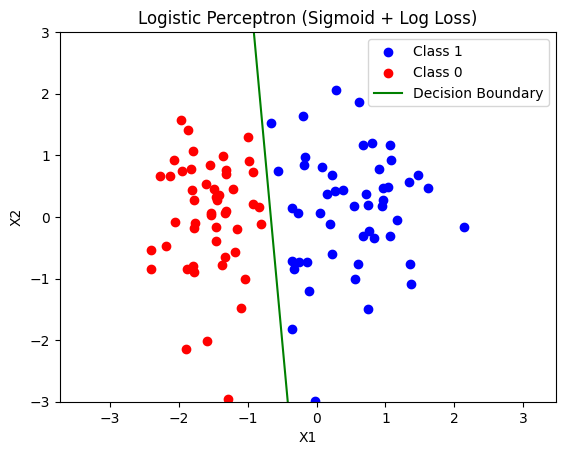

In [12]:
plt.scatter(X[y==1,0], X[y==1,1], color='blue', label='Class 1')
plt.scatter(X[y==0,0], X[y==0,1], color='red', label='Class 0')
plt.ylim(-3,3)
x_vals = np.linspace(np.min(X[:,0])-1, np.max(X[:,0])+1, 100)
y_vals = m*x_vals + c
plt.plot(x_vals, y_vals, color='green', label='Decision Boundary')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Logistic Perceptron (Sigmoid + Log Loss)")
plt.show()